# Slow waves analysis

## Intoductory notes:
This notebook presents slow waves detection functionality.

Recommended reading:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
4. [YASA: Slow-waves detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/05_sw_detection.ipynb)
5. [YASA: Multi-channel slow-wave detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/06_sw_detection_multi.ipynb)
6. [YASA: SWResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html#yasa-swresults)
4. [MNE: Time-frequency analysis: power and inter-trial coherence](https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#time-frequency-analysis-power-and-inter-trial-coherence)
5. [MNE: AverageTFR class](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html#mne-time-frequency-averagetfr)

## Import module

In [4]:
from sleepeegpy.pipeline import SlowWavesPipe
from joblib import parallel_backend; parallel_backend("loky", n_jobs=-1)

## Slow waves detection

In [5]:
slow_waves_pipe = SlowWavesPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\EL3001",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\EL3001\staging.txt",
    hypno_freq=1,
)

Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw-1.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw-2.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\after_ica_raw-3.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 5983500 ... 5985607 =  23934.000 ... 23942.428 secs
Ready.


Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.sw_detect.html) for details about the arguments.

In [6]:
slow_waves_pipe.detect(
    picks=["eeg"],
    reference="average",
    include=(2, 3),
    freq_sw=(0.3, 1.5),
    dur_neg=(0.3, 1.5),
    dur_pos=(0.1, 1),
    amp_neg=(40, 200),
    amp_pos=(10, 150),
    amp_ptp=(75, 350),
    coupling=False,
    coupling_params={"freq_sp": (12, 16), "p": 0.05, "time": 1},
    remove_outliers=False,
    verbose=False,
    save=True,
)

Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   28.8s finished


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html) for details about the arguments.

In [7]:
slow_waves_pipe.results.summary(
    grp_chan=False, grp_stage=True, mask=None, aggfunc="mean", sort=True
)

,Count,Density,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency
Stage,,,,,,,,
2,7617,69.561644,1.278879,-68.369328,39.043891,107.413219,364.222711,0.826626
3,132955,696.099476,1.259195,-61.891508,46.102154,107.993663,379.508453,0.843116


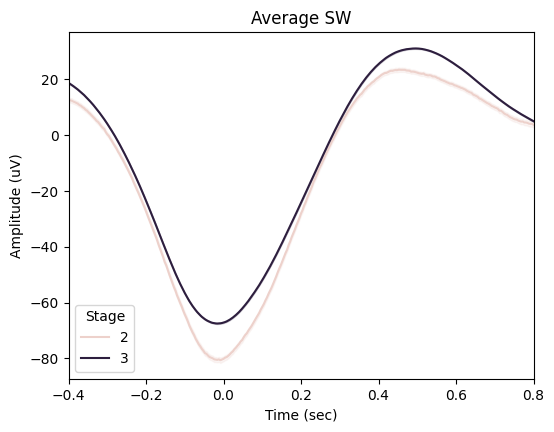

In [8]:
slow_waves_pipe.plot_average(
    save=True,
    center="NegPeak",
    hue="Stage",
    time_before=0.4,
    time_after=0.8,
    filt=(None, None),
    mask=None,
)

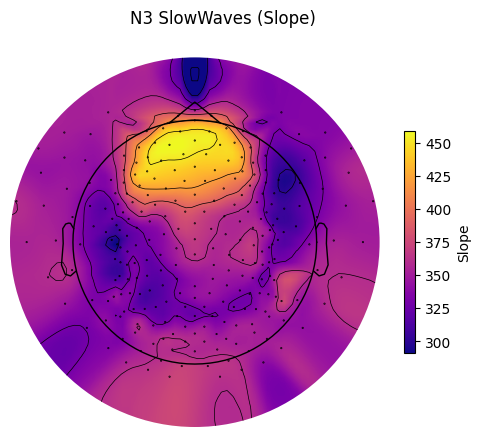

In [9]:
slow_waves_pipe.plot_topomap(
    prop="Slope",  #  Any of the event properties returned by pipe.results.summary().
    stage="N3",  # Stage to plot the topomap for.
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Should contain at least index of the provided "stage".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

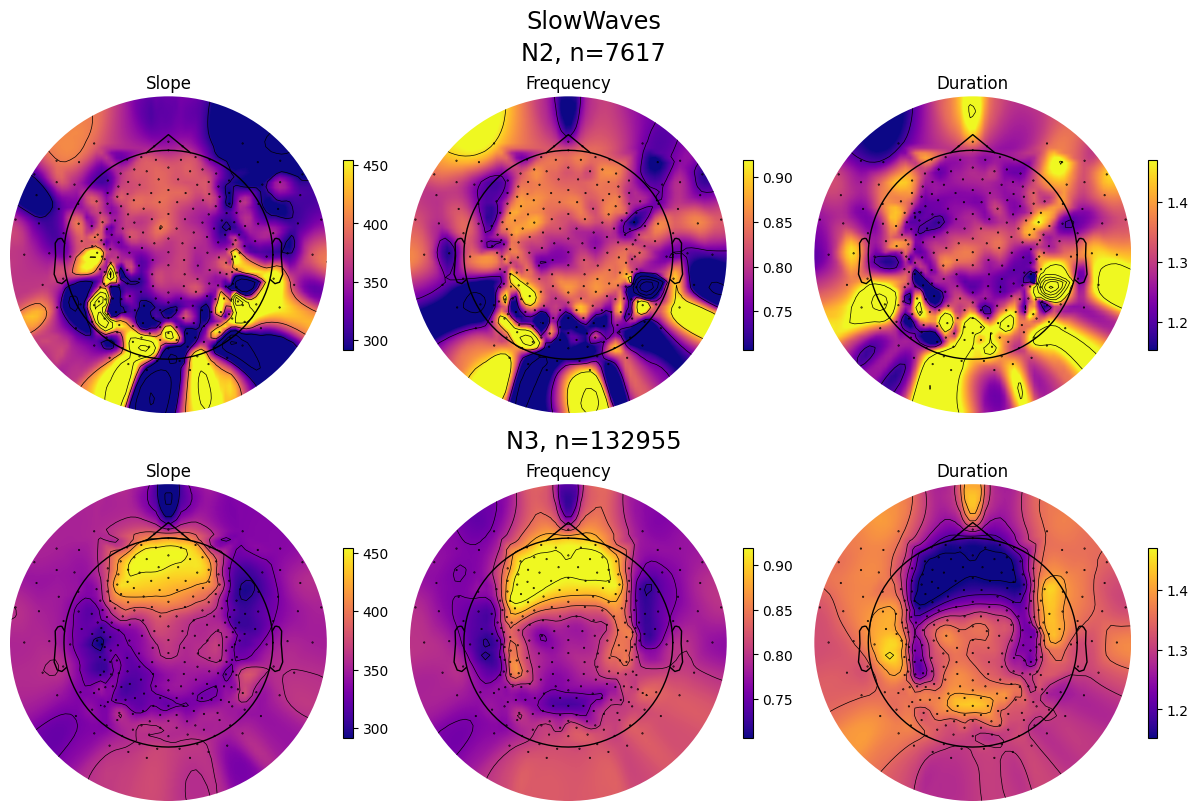

In [10]:
slow_waves_pipe.plot_topomap_collage(
    # Some of the event properties returned by pipe.results.summary().
    props=["Slope", "Frequency", "Duration"],
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={"N2": 2, "N3": 3},
    low_percentile=5,  # Set min color value by percentile of the property data.
    high_percentile=95,  # Set max color value by percentile of the property data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

Constructs MNE [AverageTFR](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html) object for every available sleep stage.

In [11]:
slow_waves_pipe.compute_tfr(
    freqs=(0.5, 5),  # Interval of frequencies of interest.
    n_freqs=100,  # TFR frequency resolution.
    time_before=4,  # Time in sec before the peak to use in TFR computation. Should be positive.
    time_after=4,  # Time in sec after the peak to use in TFR computation.
    method="morlet",  # TFR method: 'morlet' or 'multitaper'.
    save=True,  # Whether to save AverageTFR object per sleep stage as hdf5 file.
    overwrite=False,  # Whether to overwrite existings files.
    n_cycles=2,
)

slow_waves_pipe.tfrs

100%|██████████| 257/257 [14:22<00:00,  3.35s/it]


{'N2': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 29, channels : 257, ~392.7 MB>,
 'N3': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 517, channels : 257, ~392.7 MB>}

In [12]:
slow_waves_pipe.tfrs["N2"].data

array([[[  8327.17479164,   8409.2589031 ,   8491.94287836, ...,
          35404.27956195,  35156.87008082,  34909.20265543],
        [  7357.64827015,   7427.39297607,   7497.53071526, ...,
          32679.58351747,  32432.94438208,  32185.96662475],
        [  6789.54824771,   6851.55713286,   6913.75284223, ...,
          30179.76435424,  29936.52542406,  29692.83521332],
        ...,
        [  1834.03019877,   1935.24222045,   2029.3149276 , ...,
           3261.51799011,   3115.19503396,   2958.17948907],
        [  1820.85763462,   1922.53721692,   2017.05615833, ...,
           3222.94326212,   3078.62157465,   2923.30844848],
        [  1807.65889687,   1909.77336246,   2004.70576662, ...,
           3185.54221483,   3043.18328126,   2889.52841916]],

       [[ 24202.70709394,  24399.36885866,  24596.37251036, ...,
          50321.90782328,  50012.82627733,  49704.93615338],
        [ 21941.35811797,  22131.20507941,  22321.34274969, ...,
          45206.75603714,  44972.73750

In [13]:
slow_waves_pipe.tfrs["N2"].to_data_frame()

,time,freq,E1,E10,E100,E101,E102,E103,E104,E105,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,VREF
0,-4.000,0.5,8327.174792,24202.707094,48924.736669,39136.709413,16565.769149,21032.257004,16297.561439,14364.987680,...,18311.186857,11788.543531,10151.399608,813004.188548,6635.561922,9187.194787,128842.213203,212463.813057,23333.863418,23821.186402
1,-3.996,0.5,8409.258903,24399.368859,49281.102763,39406.336499,16708.449758,21202.065016,16443.286671,14494.296028,...,18444.541127,11887.000917,10243.375095,826935.307053,6700.255489,9311.619642,130066.366501,214330.539209,23559.758544,23974.795983
2,-3.992,0.5,8491.942878,24596.372510,49637.322267,39675.597990,16851.524047,21372.206949,16589.601708,14624.177349,...,18577.913438,11985.771994,10335.765080,841068.344747,6765.308494,9437.310772,131292.465082,216200.683458,23786.637260,24127.883242
3,-3.988,0.5,8575.230882,24793.703990,49993.360119,39944.465872,16994.982900,21542.672288,16736.502345,14754.629653,...,18711.293518,12084.854022,10428.569612,855405.572419,6830.719970,9564.273811,132520.345609,218074.077555,24014.490320,24280.428790
4,-3.984,0.5,8659.127428,24991.348688,50349.181273,40212.912122,17138.817163,21713.450432,16883.984341,14885.651000,...,18844.671407,12184.245884,10521.787122,869949.275252,6896.489029,9692.514330,133749.841216,219950.553685,24243.307984,24432.413277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,3.984,5.0,3429.901500,11262.392110,8186.597511,9503.453968,8531.528837,6867.098126,4830.527870,2719.352112,...,7957.036605,4867.406478,1872.140713,6163.467729,8182.874264,42196.721683,2753.857842,2645.100466,6920.765242,3162.336643
200096,3.988,5.0,3314.909209,11047.257251,7949.896955,9172.306963,8194.028659,6609.685367,4635.594985,2607.184777,...,7734.217197,4668.399175,1808.386104,6018.772218,7918.656800,41436.814301,2675.732279,2570.668662,6734.209980,3021.996150
200097,3.992,5.0,3185.542215,10759.126606,7670.569782,8801.089724,7824.249030,6324.156979,4425.367535,2485.573841,...,7469.392018,4450.939737,1736.459351,5839.955716,7613.461919,40400.796093,2582.723509,2482.027288,6506.794214,2871.973323
200098,3.996,5.0,3043.183281,10403.328748,7352.799803,8394.451726,7426.868327,6014.294154,4201.815750,2355.866277,...,7166.566486,4217.945319,1657.303549,5629.285089,7272.190910,39108.043828,2476.376797,2380.632657,6242.906538,2713.981375


No baseline correction applied


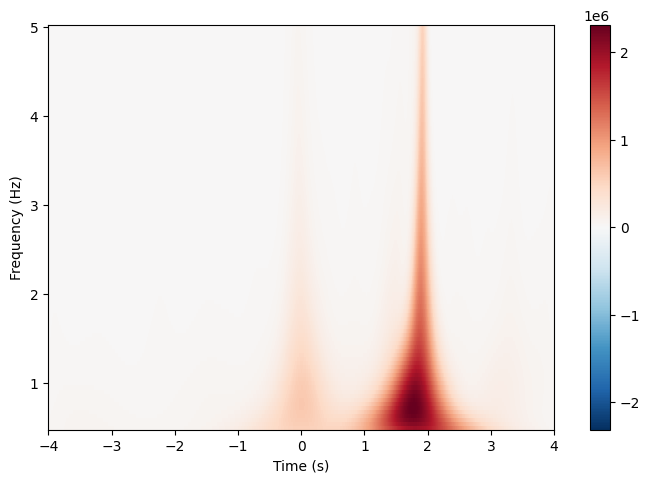

No baseline correction applied


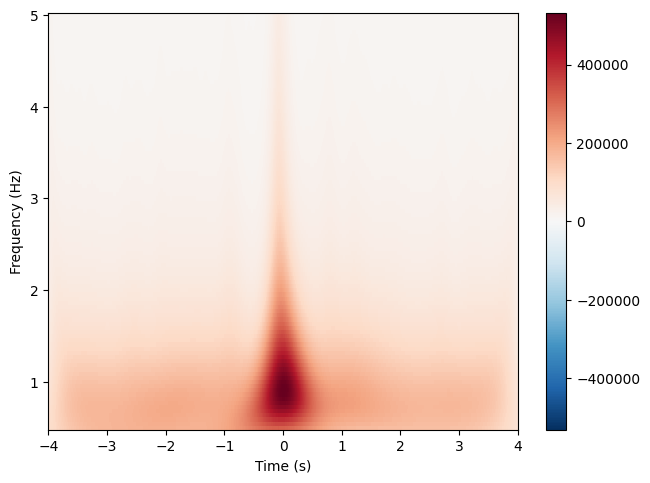

[<Figure size 640x480 with 2 Axes>]

In [16]:
slow_waves_pipe.tfrs["N2"].plot(["E101"]),
slow_waves_pipe.tfrs["N3"].plot(["E101"])

If you want to load saved TFR files:

In [15]:
slow_waves_pipe.read_tfrs(dirpath=None)

Reading C:\Users\Gennadiy\Documents\data\EL3001\SlowWavesPipe\slowwaves_N2-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\EL3001\SlowWavesPipe\slowwaves_N3-tfr.h5 ...
